


Epoch 1/10


62/62 [==============================] - 2s 4ms/step - loss: 0.0649 - mae: 0.2015
Epoch 2/10
62/62 [==============================] - 0s 4ms/step - loss: 0.0230 - mae: 0.1358
Epoch 3/10
62/62 [==============================] - 0s 4ms/step - loss: 0.0118 - mae: 0.0957
Epoch 4/10
62/62 [==============================] - 0s 4ms/step - loss: 0.0021 - mae: 0.0368
Epoch 5/10
62/62 [==============================] - 0s 3ms/step - loss: 6.0447e-04 - mae: 0.0198
Epoch 6/10
62/62 [==============================] - 0s 5ms/step - loss: 2.9370e-04 - mae: 0.0139
Epoch 7/10
62/62 [==============================] - 0s 4ms/step - loss: 1.6399e-04 - mae: 0.0105
Epoch 8/10
62/62 [==============================] - 0s 4ms/step - loss: 1.2333e-04 - mae: 0.0094
Epoch 9/10
62/62 [==============================] - 0s 4ms/step - loss: 1.1131e-04 - mae: 0.0090
Epoch 10/10
1/1 [==============================] - 0s 429ms/step
Next forecasted temperature: -0.53835726


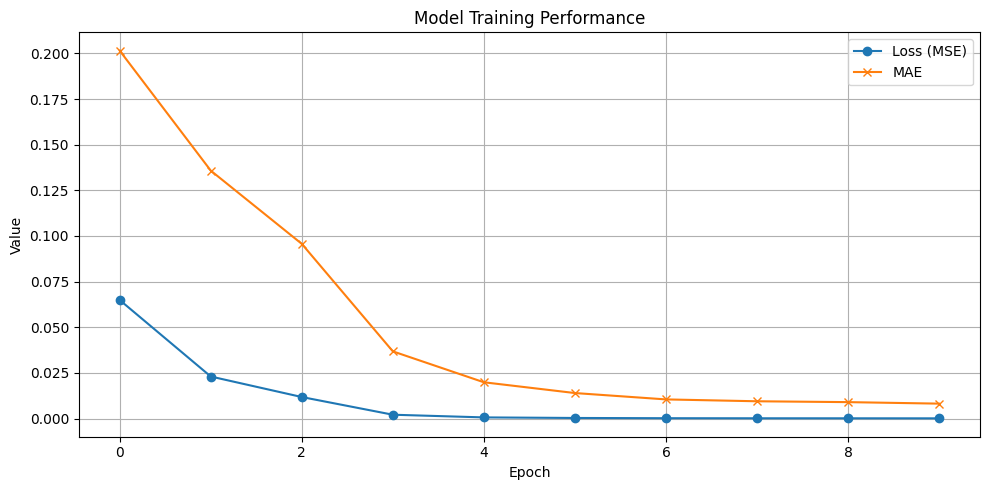

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler


data = np.sin(np.arange(0, 100, 0.1))  
df = pd.DataFrame(data, columns=['temp'])


scaler = MinMaxScaler()
scaled = scaler.fit_transform(df)


X, y = [], []
for i in range(10, len(scaled)):
    X.append(scaled[i-10:i, 0])
    y.append(scaled[i, 0])

X, y = np.array(X), np.array(y)
X = X.reshape((X.shape[0], X.shape[1], 1)) 


model = Sequential([
    LSTM(50, input_shape=(X.shape[1], 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse',metrics=['mae'])
history=model.fit(X, y, epochs=10, batch_size=16, verbose=1)


last_seq = scaled[-10:].reshape((1, 10, 1))
predicted = model.predict(last_seq)
predicted_temp = scaler.inverse_transform(predicted)
print("Next forecasted temperature:", predicted_temp[0][0])

import matplotlib.pyplot as plt




plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Loss (MSE)', marker='o')
plt.plot(history.history['mae'], label='MAE', marker='x')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('Model Training Performance')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()